# Predicting Job Placement Using Logistic Regression

A university is trying to determine the likelihood of students being placed in a job based on their academic performance and cognitive ability. They collect data on two factors for each student: CGPA (Cumulative Grade Point Average) and IQ (Intelligence Quotient). They also have information on whether each student was placed in a job after graduation (1 for placed, 0 for not placed).

Question:
The university wants to build a model to predict whether a student will get placed based on their CGPA and IQ. Using the logistic regression model:

1. Exploratory Data Analysis (EDA):

 * Analyze the distributions of CGPA and IQ scores.
 * Check for any correlations between these two factors.
 * Identify any potential missing or irrelevant data.

2. Modeling:

 * Use Logistic Regression to train a model using the available data.
 * Split the dataset into 70% training and 30% testing data.
 * Train the model and predict whether a student will get placed or not.

3. Model Evaluation:

 * Generate a confusion matrix to assess the performance of the model.
 * Calculate the accuracy of the model.
 * Use precision, recall, and F1-score to measure the classification performance.

4. Visualization:

 * Plot the decision boundary that separates students who are predicted to be placed from those who are predicted not to be placed based on their CGPA and IQ.

In [1]:
print("Hello, Begin Your Data Journey")


Hello, Begin Your Data Journey


In [2]:
!pip3 install matplotlib
!pip3 install sklearn
!pip3 install seaborn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.


In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import json

jupyter_notebook_dataset = os.getenv("dataset_url", "https://d3dyfaf3iutrxo.cloudfront.net/general/upload/849780a3ab04442cbf0f5be847f7580d.csv")
placement_data=pd.read_csv(jupyter_notebook_dataset)
placement_data


,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0
...,...,...,...,...
95,95,4.3,200.0,0
96,96,4.4,42.0,0
97,97,6.7,182.0,1
98,98,6.3,103.0,1


In [4]:
# Dropping the unnecessary index column
placement_data = placement_data.drop(columns=['Unnamed: 0'])



In [5]:
# Step 1: Checking for null values
null_values_placement = placement_data.isnull().sum()


In [6]:
# Step 2: Summary statistics

placement_data.describe()


,cgpa,iq,placement
count,100.000000,100.000000,100.000000
mean,5.991000,123.580000,0.500000
std,1.143634,39.944198,0.502519
min,3.300000,37.000000,0.000000
25%,5.075000,101.500000,0.000000
50%,6.000000,127.500000,0.500000
75%,6.900000,149.000000,1.000000
max,8.500000,233.000000,1.000000


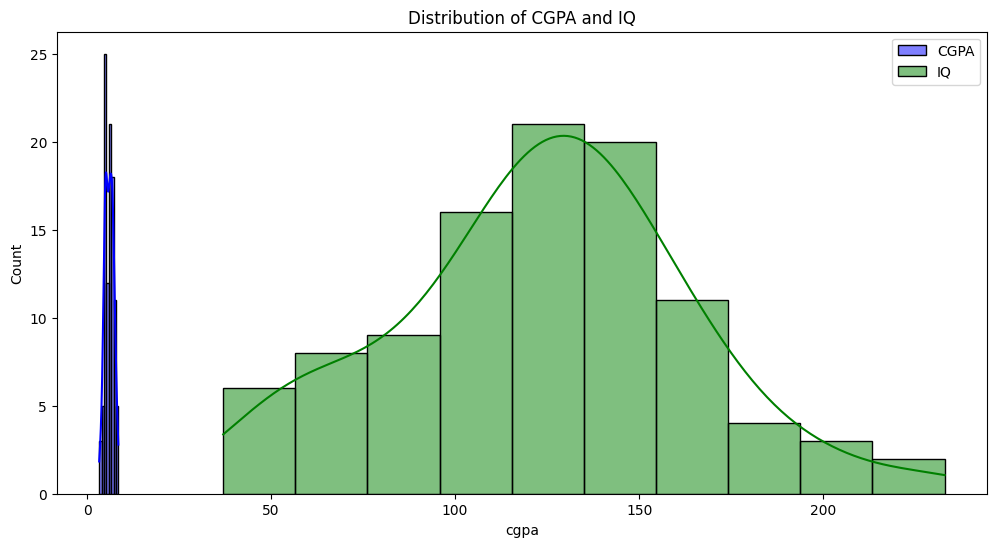

In [7]:
# Step 3: Data Visualization

plt.figure(figsize=(12, 6))

sns.histplot(placement_data['cgpa'], kde=True, color='blue', label='CGPA')

sns.histplot(placement_data['iq'], kde=True, color='green', label='IQ')

plt.legend()

plt.title('Distribution of CGPA and IQ')

plt.show()



In [8]:
# use the info funtion on the data

placement_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       100 non-null    float64
 1   iq         100 non-null    float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


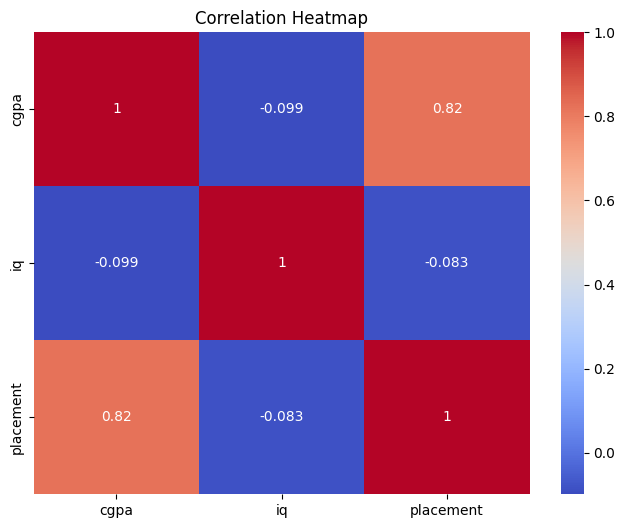

In [9]:
# Checking correlations

plt.figure(figsize=(8, 6))

sns.heatmap(placement_data.corr(), annot=True, cmap='coolwarm')

plt.title('Correlation Heatmap')

plt.show()


In [10]:
# Step 4: Feature Selection

X_placement = placement_data[['cgpa', 'iq']]

y_placement = placement_data['placement']



In [11]:
# Splitting the data into 70% training and 30% testing and random_state of 42

X_train, X_test, y_train, y_test = train_test_split(X_placement, y_placement, test_size=0.3, random_state=42)



In [12]:
# Logistic Regression Model Training


# store the Predictions in a variable "y_pred_placement"
model_placement = LogisticRegression()

model_placement.fit(X_train, y_train)

# store the Predictions in a variable "y_pred_placement"

y_pred_placement = model_placement.predict(X_test)





In [13]:
y_pred_placement


array([1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1])

In [14]:
# this is for evaluation 
json_data = json.dumps(y_pred_placement.tolist())
json_data


'[1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1]'

In [15]:
# show the Confusion Matrix and Accuracy
# store the confusion matrix in a variable 'conf_matrix_placement'
# store the accuracy in a variable 'accuracy_placement'
# store the class_report in a variable 'class_report_placement'

conf_matrix_placement = confusion_matrix(y_test, y_pred_placement)

accuracy_placement = accuracy_score(y_test, y_pred_placement)*100

class_report_placement = classification_report(y_test, y_pred_placement)


/Users/preetyrai/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


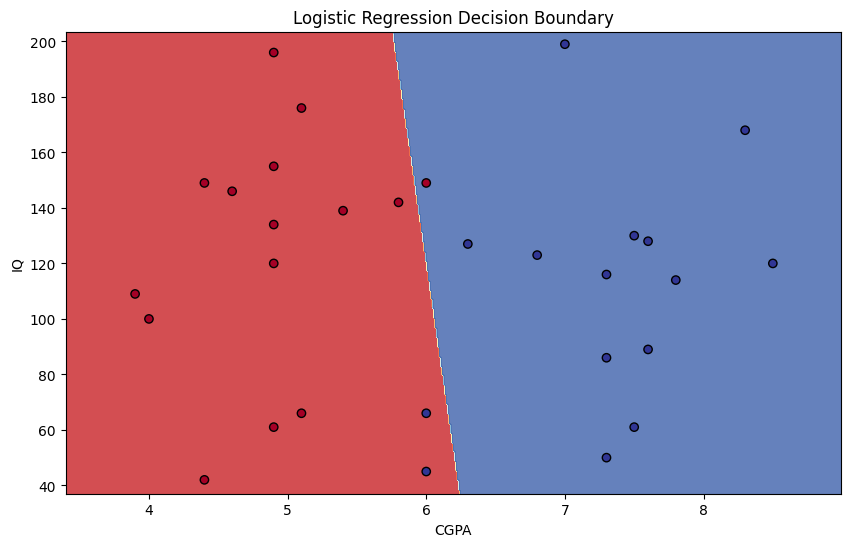

In [17]:
# Step 5: Plotting Decision Boundary
# def plot_decision_boundary_placement(X, y, model):
#     return -1 # replace the return -1 with your solution


def plot_decision_boundary_placement(X, y, model):

    x_min, x_max = X.iloc[:, 0].min() - 0.5, X.iloc[:, 0].max() + 0.5

    y_min, y_max = X.iloc[:, 1].min() - 5, X.iloc[:, 1].max() + 5

    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),

    np.arange(y_min, y_max, 0.5))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 6))

    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)

    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolors='k', cmap=plt.cm.RdYlBu)

    plt.xlabel('CGPA')

    plt.ylabel('IQ')

    plt.title('Logistic Regression Decision Boundary')

    plt.show()

plot_decision_boundary_placement(X_test, y_test, model_placement)




In [18]:
conf_matrix_placement

array([[14,  1],
       [ 2, 13]])

In [19]:
# this is for evaluation 
json_data = json.dumps(conf_matrix_placement.tolist())
json_data


'[[14, 1], [2, 13]]'

In [20]:
accuracy_placement


90.0

In [21]:
print(class_report_placement)


              precision    recall  f1-score   support

           0       0.88      0.93      0.90        15
           1       0.93      0.87      0.90        15

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



In [22]:
# this is for evaluation 
cleaned_text = class_report_placement.replace("\n", " ").replace(" ", " ")
cleaned_text


'              precision    recall  f1-score   support             0       0.88      0.93      0.90        15            1       0.93      0.87      0.90        15      accuracy                           0.90        30    macro avg       0.90      0.90      0.90        30 weighted avg       0.90      0.90      0.90        30 '